In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [ ]:
#os.chdir('C:\\Users\\user\\Documents\\Python Test files')

<IPython.core.display.Javascript object>

In [27]:
#test to see if chages will reflect in github

In [3]:
bue=pd.read_csv("buesanitized.csv")

In [4]:
bue.head()

,ID,OrderDate,productDescription,Orders,Quantity,Amount,ordermonth,orderyear
0,4,10/1/2016,28 BLACK ACAI CLASSIC,1,2,275.86,October,2016
1,5,12/1/2016,28 BLACK ACAI CLASSIC,1,20,2758.60,December,2016
2,6,3/1/2017,28 BLACK ACAI CLASSIC,1,23,3172.39,March,2017
3,7,12/1/2016,360 DOUBLE CHOCOLATE VODKA 750ML,1,1,1206.90,December,2016
4,8,3/1/2017,360 DOUBLE CHOCOLATE VODKA 750ML,1,2,2413.80,March,2017


In [5]:
bue.dropna(inplace=True)

In [6]:
import datetime

In [7]:
bue["orderday"]=pd.to_datetime(bue.OrderDate).dt.day_name()

In [8]:
bue["ordermonth"]=pd.to_datetime(bue.OrderDate).dt.month

In [9]:
bue["orderyear"]=pd.to_datetime(bue.OrderDate).dt.year

In [10]:
bue.head(10)

,ID,OrderDate,productDescription,Orders,Quantity,Amount,ordermonth,orderyear,orderday
0,4,10/1/2016,28 BLACK ACAI CLASSIC,1,2,275.86,10,2016,Saturday
1,5,12/1/2016,28 BLACK ACAI CLASSIC,1,20,2758.60,12,2016,Thursday
2,6,3/1/2017,28 BLACK ACAI CLASSIC,1,23,3172.39,3,2017,Wednesday
3,7,12/1/2016,360 DOUBLE CHOCOLATE VODKA 750ML,1,1,1206.90,12,2016,Thursday
4,8,3/1/2017,360 DOUBLE CHOCOLATE VODKA 750ML,1,2,2413.80,3,2017,Wednesday
5,9,5/1/2017,360 DOUBLE CHOCOLATE VODKA 750ML,1,1,1206.90,5,2017,Monday
6,10,7/1/2017,360 DOUBLE CHOCOLATE VODKA 750ML,1,3,3620.70,7,2017,Saturday
7,11,6/3/2018,360 DOUBLE CHOCOLATE VODKA 750ML,1,1,750.00,6,2018,Sunday
8,12,8/25/2018,360 HUCKLEBERRY 750ML,4,4,3000.00,8,2018,Saturday
9,13,12/7/2017,360 MADACASCAR VANILLA 750ML,1,2,280.00,12,2017,Thursday


In [11]:
bue.ordermonth.nunique()

12

In [12]:
bue["ordermonth"]=bue.apply(lambda x: datetime.datetime.strptime(str(x["ordermonth"]), "%m").strftime("%B"),axis=1)
#bue['ordermonth'] = pd.to_datetime(bue['ordermonth'], format='%m').dt.month_name().str.slice(stop=3)

In [13]:
bue.head()

,ID,OrderDate,productDescription,Orders,Quantity,Amount,ordermonth,orderyear,orderday
0,4,10/1/2016,28 BLACK ACAI CLASSIC,1,2,275.86,October,2016,Saturday
1,5,12/1/2016,28 BLACK ACAI CLASSIC,1,20,2758.60,December,2016,Thursday
2,6,3/1/2017,28 BLACK ACAI CLASSIC,1,23,3172.39,March,2017,Wednesday
3,7,12/1/2016,360 DOUBLE CHOCOLATE VODKA 750ML,1,1,1206.90,December,2016,Thursday
4,8,3/1/2017,360 DOUBLE CHOCOLATE VODKA 750ML,1,2,2413.80,March,2017,Wednesday


In [14]:
top_20_products=bue.groupby(["productDescription"]).sum().sort_values("Amount",ascending=False)[:20].reset_index()
top_20_products.drop(['orderyear'],axis=1,inplace=True)

<ipython-input-14-842fa9dd83e3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_20_products=bue.groupby(["productDescription"]).sum().sort_values("Amount",ascending=False)[:20].reset_index()


In [15]:
pd.set_option('display.max_rows',20)

In [16]:
#bue.to_csv('C:\\Users\\user\\Documents\\Python Test files\\buesanitized.csv')

In [17]:
top_20_products

,productDescription,ID,Orders,Quantity,Amount
0,TUSKER LAGER BOTTLE 500ML,523983167,15277,207386,30257553.00
1,GUINNESS BOTTLE 500ML,325811689,15729,171820,27967095.22
2,BALOZI 500ML,49327310,12048,188784,26179250.96
3,WHITE CAP LAGER BTL 500ML,530601752,10458,163659,25357731.00
4,TUSKER LAGER CAN 500ML,599296179,37211,147674,24297321.49
5,GILBEYâ€™S 750ML,268813484,16005,18895,21855089.00
6,GUINNESS CAN 500ML,346958295,42218,93994,17623611.57
7,WHITE CAP CAN 500ML,556013670,31150,82042,15325862.00
8,JACK DANIELS 1LT,253798982,3274,3756,14676440.00
9,DUNHILL DOUBLE SWITCH (2),201251695,17884,58914,14302989.87


In [18]:
bottom_20_products=bue.groupby(["productDescription"]).sum().sort_values("Amount",ascending=True)[:20].reset_index()
bottom_20_products.drop(['orderyear'],axis=1,inplace=True)

<ipython-input-18-8ed79d988eab>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bottom_20_products=bue.groupby(["productDescription"]).sum().sort_values("Amount",ascending=True)[:20].reset_index()


In [19]:
bottom_20_products

,productDescription,ID,Orders,Quantity,Amount
0,GLEN LIVET 12YRS 1LTR,1456382,8,-5,-28675.86
1,EMPTY BOTTLE300ML/500ML,1155737,8,-171,-3685.36
2,OBIKWA PINOTAGE 750ML,694159,2,-3,-1990.34
3,OFFICERS CHOICE PRESTIGE WHISKY,695074,2,-1,-141.23
4,gibson test,135392,2,2,20.00
5,Mountain Dew,2490858,13,33,65.80
6,KREST GINGER ALE BOTTLE 300ML,338710,1,3,90.00
7,FANTA PINEAPPLE 2 L,192468,1,1,146.55
8,COKE SODA 300ML,282261,3,6,155.16
9,COKE ENERGY 300ML,78991,1,2,160.00


In [20]:
#bue.Amount=bue.Amount.apply(lambda x:abs(x)) to convert all the values in the Amount column to their absolute values
top_product_per_year=bue.groupby(['orderyear','Amount','productDescription']).size().groupby(level=0).tail(1).reset_index()
top_product_per_year.drop(0,inplace=True,axis=1)

#top_product_per_year=[]
#for i in bue.orderyear.unique():
  #product=bue[bue.orderyear==i]
  #product=product.groupby(['orderyear','Amount','productDescription']).size().reset_index().tail(1)
  #top_product_per_year.append(product)

#top_product_per_year=pd.concat(top_product_per_year)
#top_product_per_year=top_product_per_year.reset_index()
#top_product_per_year.drop(['index',0],inplace=True,axis=1)

In [21]:
top_product_per_year

,orderyear,Amount,productDescription
0,2016,730109.92,TUSKER LAGER CAN 500ML
1,2017,590074.71,TUSKER LAGER CAN 500ML
2,2018,90000.00,JW GOLD RESERVE BULLION 750ML
3,2019,209180.00,BALOZI 500ML
4,2020,185580.00,BALOZI 500ML
5,2021,203115.00,GUINNESS BOTTLE 500ML


Text(0.5, 1.0, 'Top 20 products')

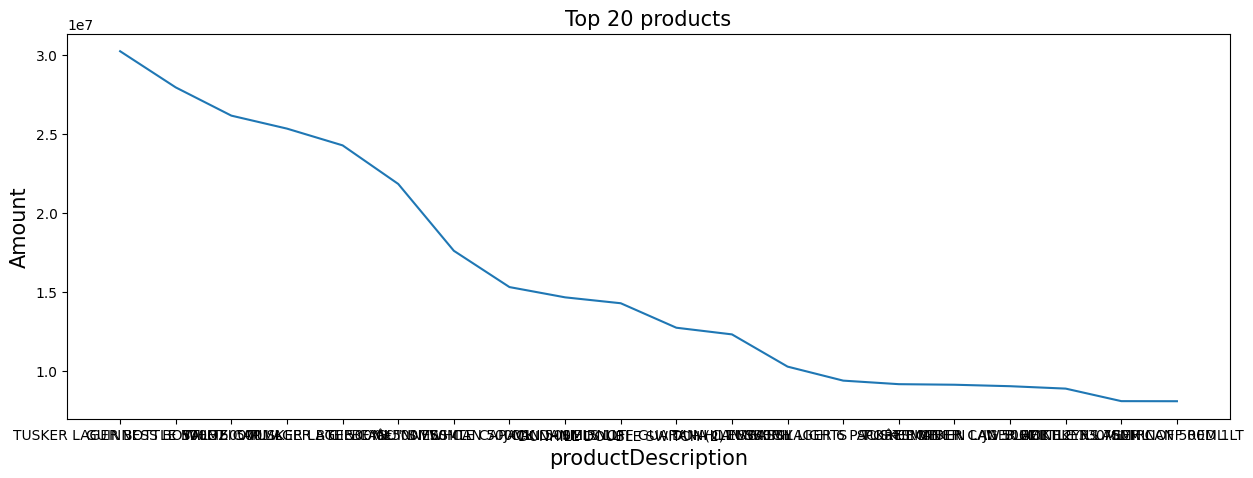

In [22]:
plt.figure(figsize=(15,5))
sns.lineplot(data=top_20_products,x='productDescription',y='Amount')
sns.set_style('darkgrid')
plt.xlabel('productDescription',size=15)
plt.ylabel('Amount',size=15)
plt.title('Top 20 products',size=15)

In [23]:
bottom_product_per_year=bue.groupby(['orderyear','Amount','productDescription']).size().groupby(level=0).head(1).reset_index()
bottom_product_per_year.drop(0,inplace=True,axis=1)

In [24]:
bottom_product_per_year

,orderyear,Amount,productDescription
0,2016,-10862.07,BLACK TOWER PINOT NOIR 750ML
1,2017,-68275.86,GLEN LIVET 12YRS 1LTR
2,2018,0.00,FANTA BLACKCURRANT PET 500ML
3,2019,0.00,4 COUSINS SWEET WHITE 750ML
4,2020,0.00,4TH STREET SWEET RED 5LT
5,2021,0.00,JW WHITE WALKER 750ML


In [25]:
bue["ordermonth"] = bue["ordermonth"].astype('category').cat.reorder_categories(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'])

In [26]:
yearlysales=bue.pivot_table(index="orderyear",columns='ordermonth',values="Amount",aggfunc='sum',
                            margins = True, margins_name='Total')

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) #converts float values from scitific notation to decimal with %.2f indicating 2 decimal places


In [ ]:
yearlysales

ordermonth,January,February,March,April,May,June,July,August,September,October,November,December,Total
orderyear,,,,,,,,,,,,,
2016,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4596984.20,8337309.21,15361797.15,28296090.56
2017,10127097.21,9585478.48,9926599.33,11927700.50,10282648.55,11354827.89,11369500.87,10875261.68,16077321.00,18005590.00,18757088.00,27461174.00,165750287.51
2018,13828357.00,13089254.00,14340608.00,13569054.00,13630254.00,14960658.00,15302113.00,15272543.00,15684410.00,14760025.00,15307608.00,26044924.00,185789808.00
2019,15231589.00,13929064.00,15341771.00,17473319.00,16023809.00,17947028.00,17247221.00,19369648.00,17031613.00,17816481.00,18237091.00,36453093.00,222101727.00
2020,22895900.00,21756272.00,24704528.00,25355323.00,26826277.00,25438875.00,25504740.00,26737660.00,25939226.00,26598269.00,20512121.00,31269655.00,303538846.00
2021,20942261.00,19233869.00,21420298.00,24737605.00,26744016.00,23899413.00,25624549.00,23444587.00,21155875.00,26794555.00,17828695.00,0.00,251825723.00
Total,83025204.21,77593937.48,85733804.33,93063001.50,93507004.55,93600801.89,95048123.87,95699699.68,95888445.00,108571904.20,98979912.21,136590643.15,1157302482.07


In [ ]:
top_selling_months=bue.groupby(["ordermonth"]).sum().sort_values("Amount",ascending=False).reset_index()
top_selling_months.drop(['orderyear'],axis=1,inplace=True)

In [ ]:
top_selling_months

,ordermonth,Orders,Quantity,Amount,orderday
0,December,140144,366521,136590643.15,645058
1,October,129436,356186,108571904.20,617139
2,November,116538,304076,98979912.21,539823
3,September,122822,312473,95888445.00,572915
4,August,117537,299350,95699699.68,525760
...,...,...,...,...,...
7,May,115309,285183,93507004.55,535880
8,April,113435,277310,93063001.50,504501
9,March,109773,265011,85733804.33,521050
10,January,101069,265862,83025204.21,489421


Text(0.5, 1.0, 'Top selling months')

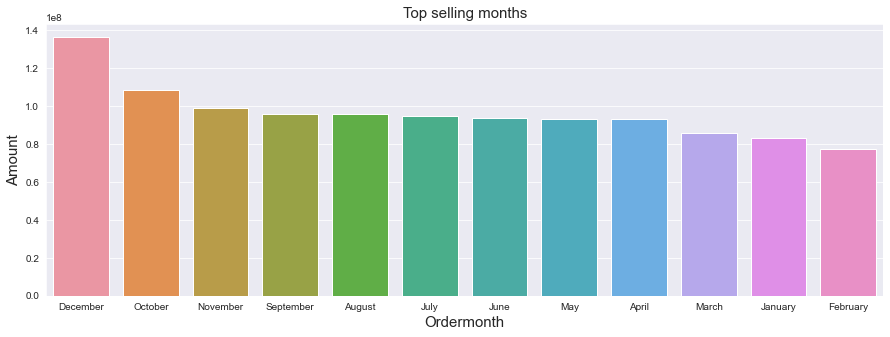

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=top_selling_months,x='ordermonth',y='Amount')
sns.set_style('darkgrid')
plt.xlabel('Ordermonth',size=15)
plt.ylabel('Amount',size=15)
plt.title('Top selling months',size=15)

In [ ]:
top_selling_days=bue.groupby(["orderday"]).sum().sort_values("Amount",ascending=False).reset_index()
top_selling_days.drop(['orderyear'],axis=1,inplace=True)

In [ ]:
top_selling_days

,orderday,Orders,Quantity,Amount
0,Saturday,300091,756098,263204765.57
1,Friday,254760,581751,202759073.00
2,Sunday,207918,567608,170487577.21
3,Thursday,172892,482651,156108588.04
4,Wednesday,157047,416625,127518859.81
5,Tuesday,152336,390224,125311296.89
6,Monday,143650,370531,111912321.55


Text(0.5, 1.0, 'Top selling days')

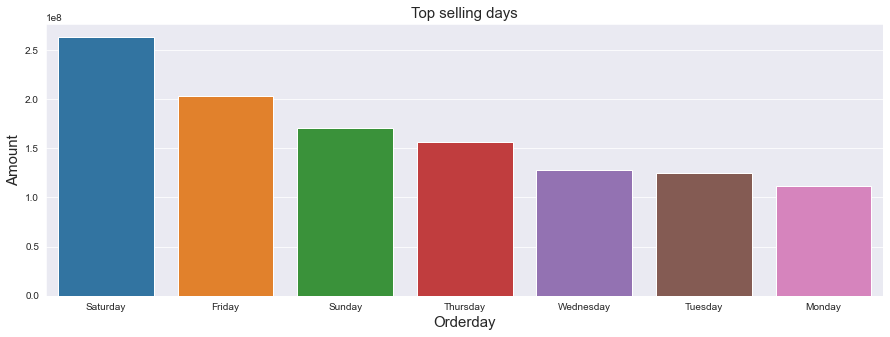

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=top_selling_days,x='orderday',y='Amount')
sns.set_style('darkgrid')
plt.xlabel('Orderday',size=15)
plt.ylabel('Amount',size=15)
plt.title('Top selling days',size=15)

## Summary
From the analysis and Pivot table above, it is observed that December is the month with the highest sales followed by October and November while February is the month with the lowest sales followed by January and March. the most selling days are Saturday, Friday and Sunday while the least selling days are Monday, Tuesday and Wednesday

In [ ]:
top_yearly_sales=bue.groupby(["orderyear"]).sum().sort_values("Amount",ascending=False).reset_index()

In [ ]:
top_yearly_sales

,orderyear,Orders,Quantity,Amount,orderday
0,2020,365469,1008347,303538846.00,1547969
1,2021,287633,839630,251825723.00,1285106
2,2019,316555,613561,222101727.00,1492047
3,2018,303033,494288,185789808.00,1375387
4,2017,113867,519195,165750287.51,701565
5,2016,2137,90467,28296090.56,2115


Text(0.5, 1.0, 'Total sales per year')

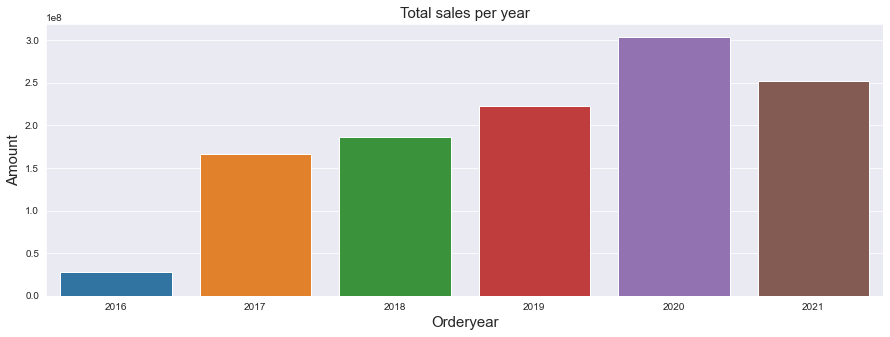

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=top_yearly_sales,x='orderyear',y='Amount')
sns.set_style('darkgrid')
plt.xlabel('Orderyear',size=15)
plt.ylabel('Amount',size=15)
plt.title('Total sales per year',size=15)

In [ ]:
twenty16=bue[bue['orderyear']==2016].reset_index()
twenty17=bue[bue['orderyear']==2017].reset_index()
twenty18=bue[bue['orderyear']==2018].reset_index()
twenty19=bue[bue['orderyear']==2019].reset_index()
twenty20=bue[bue['orderyear']==2020].reset_index()
twenty21=bue[bue['orderyear']==2021].reset_index()

In [ ]:
twenty16.drop(['index'],axis=1,inplace=True)

In [ ]:
twenty16.head()

,OrderDate,productDescription,Orders,Quantity,Amount,orderday,ordermonth,orderyear
0,2016-10-01,28 BLACK ACAI CLASSIC,1,2,275.86,Saturday,October,2016
1,2016-12-01,28 BLACK ACAI CLASSIC,1,20,2758.60,Thursday,December,2016
2,2016-12-01,360 DOUBLE CHOCOLATE VODKA 750ML,1,1,1206.90,Thursday,December,2016
3,2016-12-01,360 MANDARIN ORANGE FLAVOUR VODKA 750ML,1,1,1206.90,Thursday,December,2016
4,2016-11-01,28 BLACK ACAI CLASSIC,1,29,3999.97,Tuesday,November,2016


In [ ]:
twenty16["ordermonth"] = twenty16["ordermonth"].astype('category').cat.remove_categories(['January', 'February', 'March',
                                                                         'April','May','June','July','August','September'])

Text(0, 0.5, 'Amount')

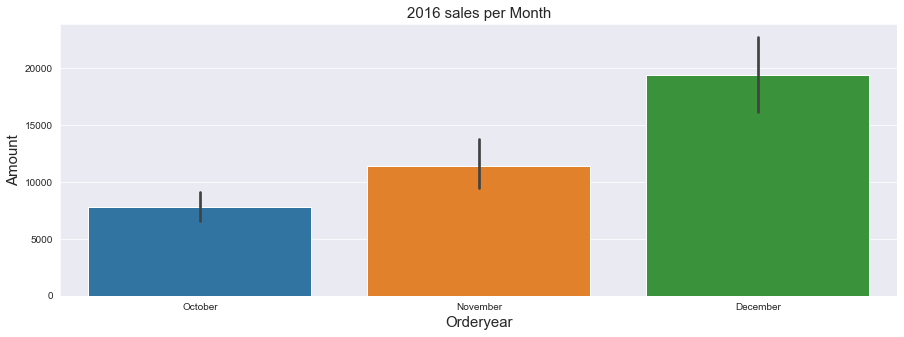

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=twenty16,x='ordermonth',y='Amount')
sns.set_style('darkgrid')
plt.title('2016 sales per Month',size=15)
plt.xlabel('Orderyear',size=15)
plt.ylabel('Amount',size=15)

In [ ]:
twenty17["ordermonth"] = twenty17["ordermonth"].astype('category').cat.reorder_categories(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'])
twenty18["ordermonth"] = twenty18["ordermonth"].astype('category').cat.reorder_categories(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'])
twenty19["ordermonth"] = twenty19["ordermonth"].astype('category').cat.reorder_categories(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'])
twenty20["ordermonth"] = twenty20["ordermonth"].astype('category').cat.reorder_categories(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'])
twenty21["ordermonth"] = twenty21["ordermonth"].astype('category').cat.remove_categories('December')

Text(0, 0.5, 'Amount')

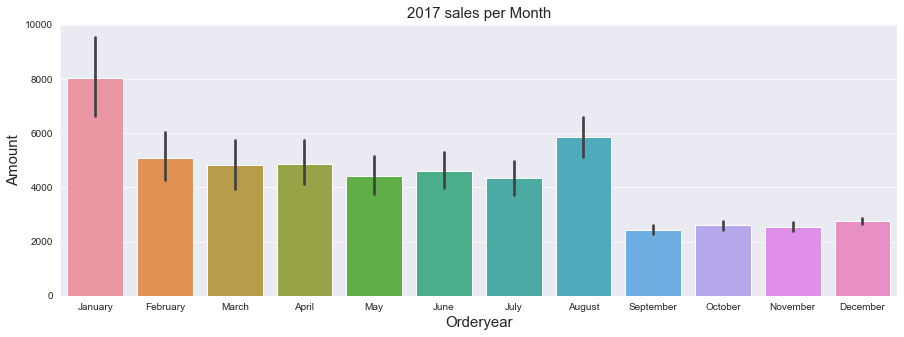

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=twenty17,x='ordermonth',y='Amount')
sns.set_style('darkgrid')
plt.title('2017 sales per Month',size=15)
plt.xlabel('Orderyear',size=15)
plt.ylabel('Amount',size=15)

Text(0, 0.5, 'Amount')

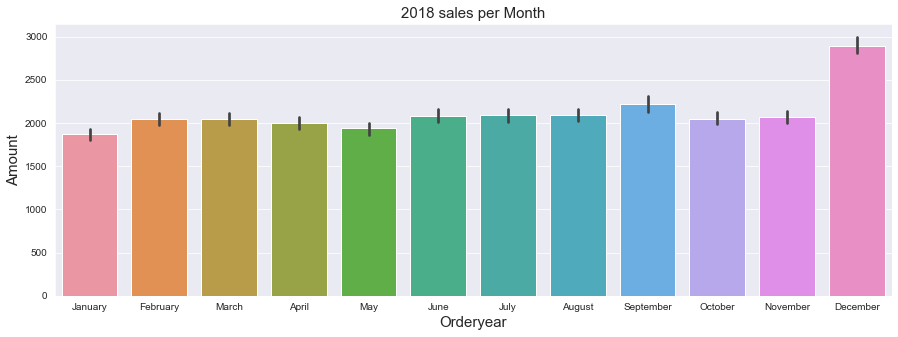

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=twenty18,x='ordermonth',y='Amount')
sns.set_style('darkgrid')
plt.title('2018 sales per Month',size=15)
plt.xlabel('Orderyear',size=15)
plt.ylabel('Amount',size=15)

Text(0, 0.5, 'Amount')

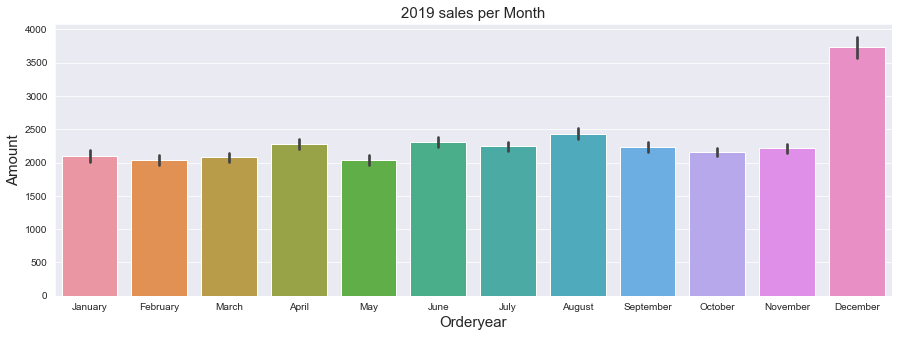

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=twenty19,x='ordermonth',y='Amount')
sns.set_style('darkgrid')
plt.title('2019 sales per Month',size=15)
plt.xlabel('Orderyear',size=15)
plt.ylabel('Amount',size=15)

Text(0, 0.5, 'Amount')

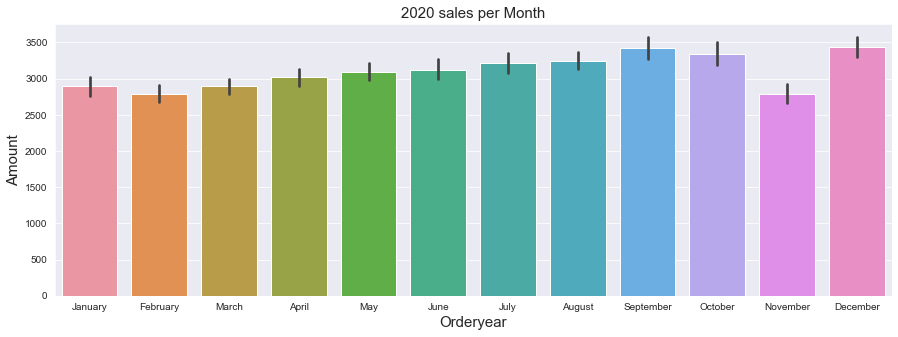

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=twenty20,x='ordermonth',y='Amount')
sns.set_style('darkgrid')
plt.title('2020 sales per Month',size=15)
plt.xlabel('Orderyear',size=15)
plt.ylabel('Amount',size=15)

Text(0, 0.5, 'Amount')

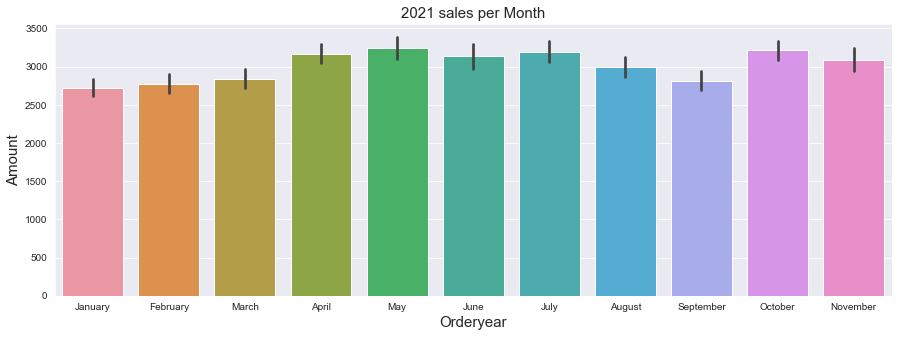

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=twenty21,x='ordermonth',y='Amount')
sns.set_style('darkgrid')
plt.title('2021 sales per Month',size=15)
plt.xlabel('Orderyear',size=15)
plt.ylabel('Amount',size=15)